# HealthCare dataset
1. detect patterns and relationships
2. Handle data quailty issue 
3. perform eda


### Load dataset


In [2]:
#importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Basic information
print("Shape:",df.shape)
#Data info
print("Data info:\n",df.info())
# Summarize 
print(df.describe())

Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
Data info:
 None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.00

### Missing Value analysis

In [5]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df)) *100

})
missing.sort_values(by='missing_percent',ascending=False)




,missing_count,missing_percent
bmi,201,3.933464
id,0,0.000000
age,0,0.000000
gender,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
work_type,0,0.000000
ever_married,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


### Handling Missing Value


In [4]:
# Example: Fill missing BMI with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_23476\945785256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [7]:
# Check duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
df.dtypes
# Convert 'gender', 'smoking_status', etc. to categorical
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in cat_cols:
    df[col] = df[col].astype('category')


0


### Analysis

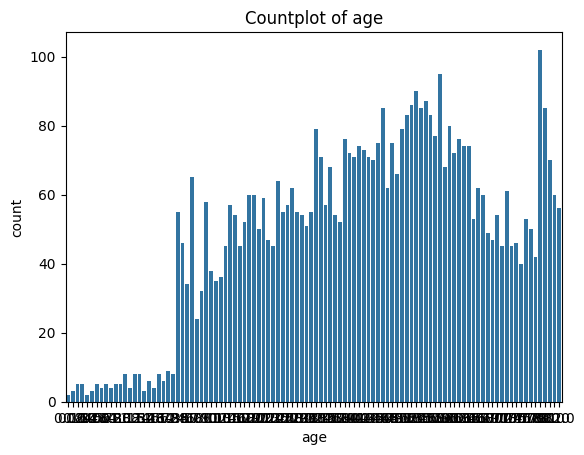

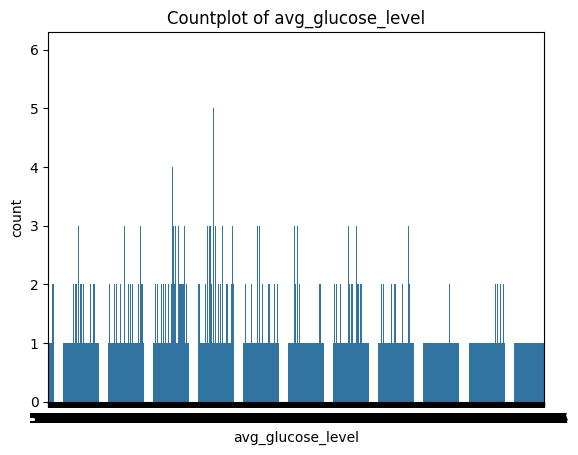

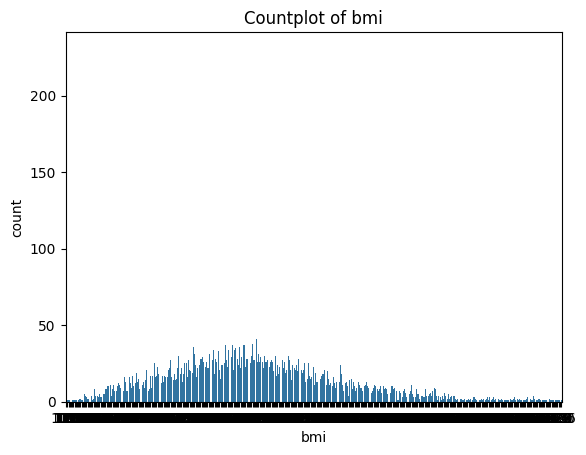

In [8]:
#Univariate -numerical
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.show()

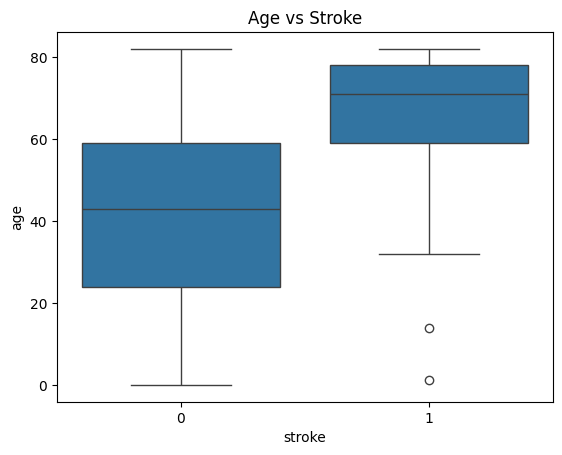

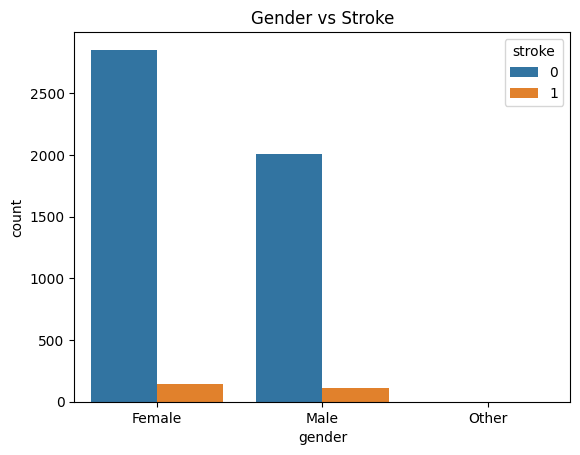

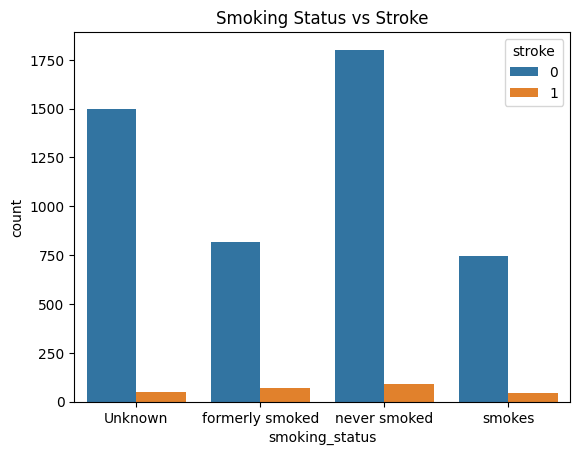

In [9]:
#Bivariate
# Age vs Stroke
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age vs Stroke")
plt.show()

# Gender vs Stroke
sns.countplot(x='gender', hue='stroke', data=df)
plt.title("Gender vs Stroke")
plt.show()

# Smoking Status vs Stroke
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title("Smoking Status vs Stroke")
plt.show()


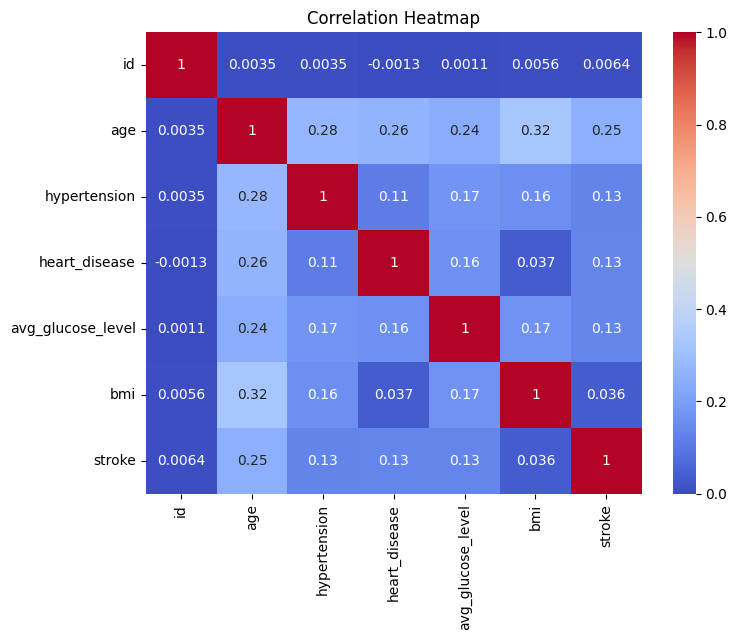

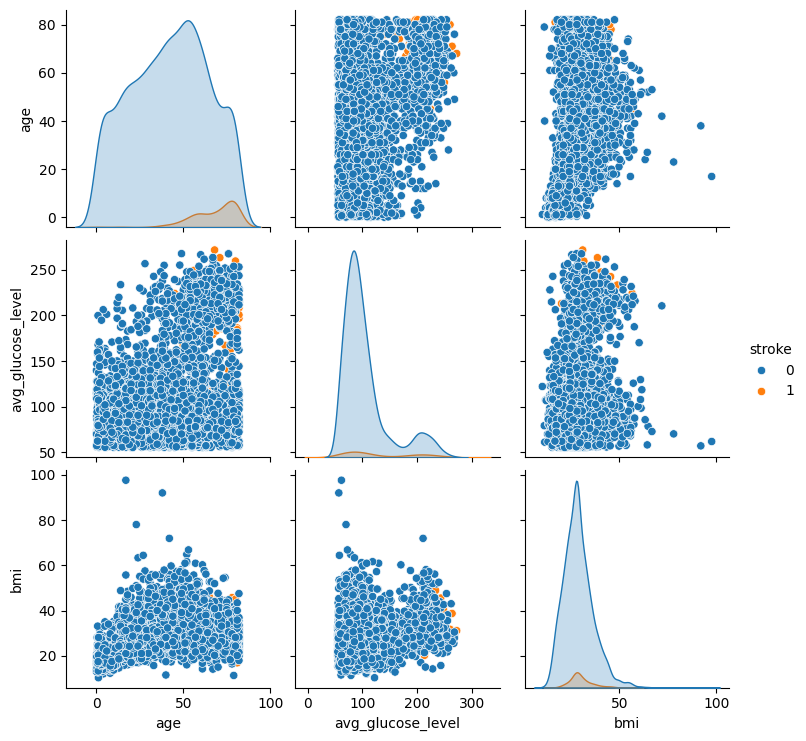

In [10]:
#Multivariate
# Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df, vars=['age','avg_glucose_level','bmi'], hue='stroke')
plt.show()


### Outlier 


Number of outliers in age: 0


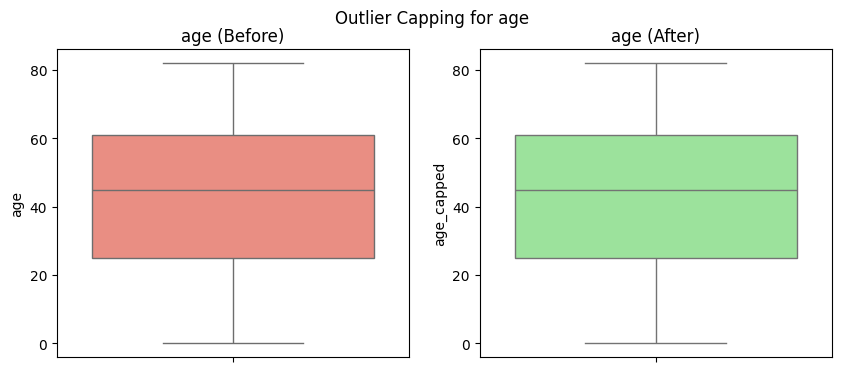

Number of outliers in avg_glucose_level: 627


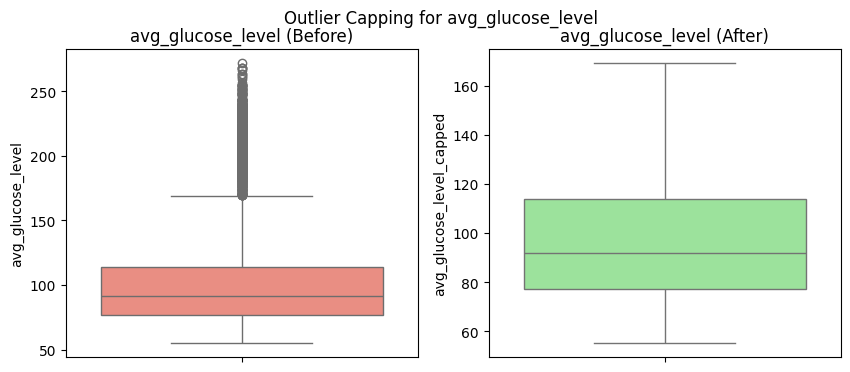

Number of outliers in bmi: 126


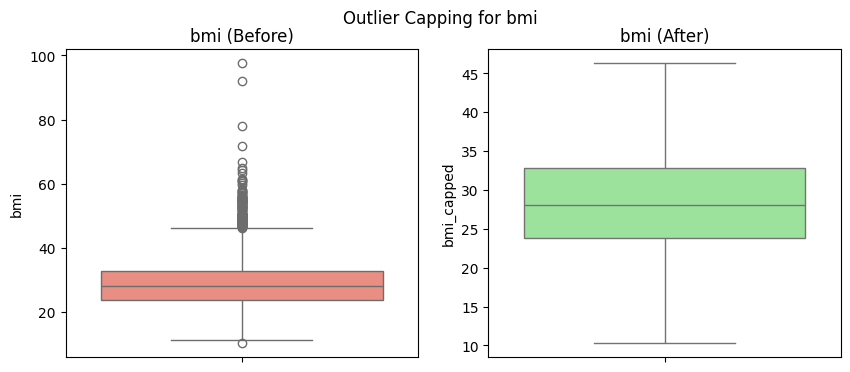

In [11]:
# Numerical columns
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Number of outliers in {col}: {len(outliers)}")

    # Capping outliers
    df[f'{col}_capped'] = df[col].clip(lower, upper)

    # Visualize before and after
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.boxplot(y=df[col], ax=axes[0], color='salmon')
    axes[0].set_title(f"{col} (Before)")
    sns.boxplot(y=df[f'{col}_capped'], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"{col} (After)")
    plt.suptitle(f"Outlier Capping for {col}")
    plt.show()


### Feature Engineering 

In [12]:
# Create Age Group
df['age_group'] = pd.cut(df['age_capped'],
                         bins=[0, 18, 40, 60, 80, 100],
                         labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly'])

# BMI Category
df['bmi_category'] = pd.cut(df['bmi_capped'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])

# Glucose Level Category
df['glucose_category'] = pd.cut(df['avg_glucose_level_capped'],
                                bins=[0, 90, 140, 200, 300],
                                labels=['Low', 'Normal', 'High', 'Very High'])


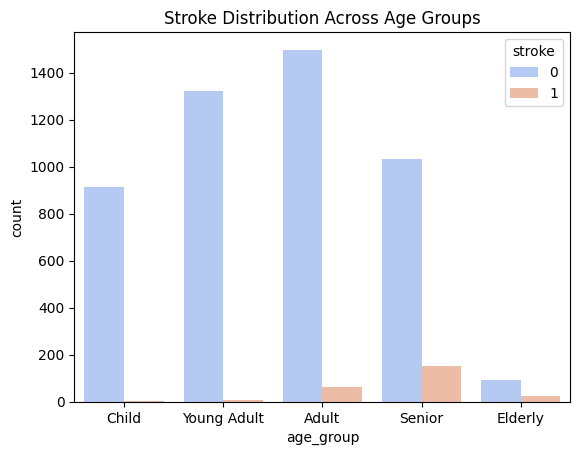

In [ ]:
#Age Group Vs Stroke 
sns.countplot(x='age_group', hue='stroke', data=df, palette='coolwarm')
plt.title("Stroke Distribution Across Age Groups")
plt.show()


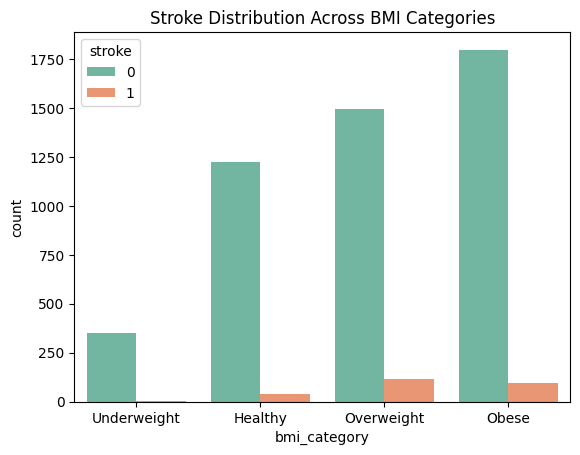

In [14]:
# BMI Category Vs Stroke
sns.countplot(x='bmi_category', hue='stroke', data=df, palette='Set2')
plt.title("Stroke Distribution Across BMI Categories")
plt.show()
